## Clustering

We use a simple k-means algorithm to demonstrate how clustering can be done. Clustering can help discover valuable, hidden groupings within the data. The dataset is created in the [Obtain_dataset Notebook](Obtain_dataset.ipynb).

In [433]:
# imports
import numpy as np
import pandas as pd
from ast import literal_eval
# load data
datafile_path = "../2-Data/dialogues_embededd.pkl"
df = pd.read_pickle(datafile_path)

In [434]:
df

,Description,Patient,Doctor,combined,n_tokens,embedding
255916,What medicine is best for taking out pores and...,"Hi, I am (Simran) 28 years (Female) hight 5/3 ...","Hi simran, your problem can be best sort out u...",Description: What medicine is best for taking ...,282,"[-0.2568769, 0.14872037, 0.17243277, 0.2426784..."
255917,What causes non conception despite unprotected...,"Hi, i am living with my partner from last six ...",do serum tsh and serum prolactin den do hsg on...,Description: What causes non conception despit...,195,"[-0.058888793, 0.084498726, -0.05540138, 0.021..."
255918,How long after getting chicken pox is it safe ...,i am 25 yrs old. last year in June i had an IU...,"Hi, I think you should keep a gap of 3 months ...",Description: How long after getting chicken po...,254,"[-0.12680525, -0.01062898, -0.25460148, 0.0511..."
255919,How to remove unwanted hair without any side e...,hi doctor! i m 22 years old and i want to remo...,"Hello, which part of the body do you have thes...",Description: How to remove unwanted hair witho...,110,"[0.12641467, -0.1543769, 0.42004266, 0.1722529..."
255920,I am 15. Can i shave my pubic hair?,"sorry,im just curious because im 15 and when i...","haha aw. Yes your supposed to shave, trim it f...",Description: I am 15. Can i shave my pubic hai...,223,"[-0.06219541, 0.020706447, 0.38799724, -0.0219..."
...,...,...,...,...,...,...
256911,Why is hair fall increasing while using Bontre...,I am suffering from excessive hairfall. My doc...,"Hello Dear Thanks for writing to us, we are he...",Description: Why is hair fall increasing while...,211,"[-0.17113408, 0.10835318, 0.33148944, -0.06146..."
256912,Why was I asked to discontinue Androanagen whi...,"Hi Doctor, I have been having severe hair fall...","hello, hair4u is combination of minoxid...",Description: Why was I asked to discontinue An...,154,"[-0.24637492, 0.031407423, -0.05137701, -0.301..."
256913,Can Mintop 5% Lotion be used by women for seve...,Hi..i hav sever hair loss problem so consulted...,HI I have evaluated your query thoroughly you...,Description: Can Mintop 5% Lotion be used by w...,191,"[-0.32340947, 0.3667281, 0.3651925, -0.0989788..."
256914,Is Minoxin 5% lotion advisable instead of Foli...,"Hi, i am 25 year old girl, i am having massive...",Hello and Welcome to ‘Ask A Doctor’ service.I ...,Description: Is Minoxin 5% lotion advisable in...,232,"[-0.18737659, 0.12219846, 0.2365137, 0.1126744..."


In [435]:
df["embedding"] = df.embedding.apply(np.array)  # convert string to numpy array
matrix = np.vstack(df.embedding.values)
matrix.shape


(1000, 384)

In [436]:

#df["embedding_doctor"] = df.embedding_doctor.apply(np.array)  # convert string to numpy array
#matrix = np.vstack(df.embedding_doctor.values)
#matrix.shape


In [437]:
df

,Description,Patient,Doctor,combined,n_tokens,embedding
255916,What medicine is best for taking out pores and...,"Hi, I am (Simran) 28 years (Female) hight 5/3 ...","Hi simran, your problem can be best sort out u...",Description: What medicine is best for taking ...,282,"[-0.2568769, 0.14872037, 0.17243277, 0.2426784..."
255917,What causes non conception despite unprotected...,"Hi, i am living with my partner from last six ...",do serum tsh and serum prolactin den do hsg on...,Description: What causes non conception despit...,195,"[-0.058888793, 0.084498726, -0.05540138, 0.021..."
255918,How long after getting chicken pox is it safe ...,i am 25 yrs old. last year in June i had an IU...,"Hi, I think you should keep a gap of 3 months ...",Description: How long after getting chicken po...,254,"[-0.12680525, -0.01062898, -0.25460148, 0.0511..."
255919,How to remove unwanted hair without any side e...,hi doctor! i m 22 years old and i want to remo...,"Hello, which part of the body do you have thes...",Description: How to remove unwanted hair witho...,110,"[0.12641467, -0.1543769, 0.42004266, 0.1722529..."
255920,I am 15. Can i shave my pubic hair?,"sorry,im just curious because im 15 and when i...","haha aw. Yes your supposed to shave, trim it f...",Description: I am 15. Can i shave my pubic hai...,223,"[-0.06219541, 0.020706447, 0.38799724, -0.0219..."
...,...,...,...,...,...,...
256911,Why is hair fall increasing while using Bontre...,I am suffering from excessive hairfall. My doc...,"Hello Dear Thanks for writing to us, we are he...",Description: Why is hair fall increasing while...,211,"[-0.17113408, 0.10835318, 0.33148944, -0.06146..."
256912,Why was I asked to discontinue Androanagen whi...,"Hi Doctor, I have been having severe hair fall...","hello, hair4u is combination of minoxid...",Description: Why was I asked to discontinue An...,154,"[-0.24637492, 0.031407423, -0.05137701, -0.301..."
256913,Can Mintop 5% Lotion be used by women for seve...,Hi..i hav sever hair loss problem so consulted...,HI I have evaluated your query thoroughly you...,Description: Can Mintop 5% Lotion be used by w...,191,"[-0.32340947, 0.3667281, 0.3651925, -0.0989788..."
256914,Is Minoxin 5% lotion advisable instead of Foli...,"Hi, i am 25 year old girl, i am having massive...",Hello and Welcome to ‘Ask A Doctor’ service.I ...,Description: Is Minoxin 5% lotion advisable in...,232,"[-0.18737659, 0.12219846, 0.2365137, 0.1126744..."



## 1. Find the number of clusters

In [438]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import sklearn

In [439]:
df["embedding"] = df.embedding.apply(np.array)  # convert string to numpy array

In [440]:
X=df.iloc[:, 5].values

In [441]:
#df.iloc[:, 5]

In [442]:
X_input=[embed.tolist() for embed in X]

In [443]:
#this is your array with the values
X = np.array(X_input)

In [444]:
len(X_input)

1000

In [445]:
len(X_input[:2][1])

384

In [446]:
from sklearn.cluster import KMeans
wcss = [] 
max=20
for i in range(1, max): 
    kmeans = KMeans(n_init = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

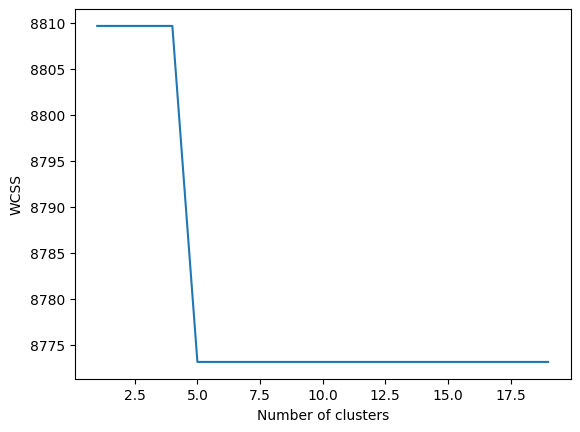

In [447]:
plt.plot(range(1, max), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

### 1. Find the clusters using K-means

We show the simplest use of K-means. You can pick the number of clusters that fits your use case best.

In [458]:
from sklearn.cluster import KMeans
n_clusters = 7
kmeans = KMeans(n_init=n_clusters, init="k-means++", random_state=42)
kmeans.fit(matrix)
labels = kmeans.labels_
df["Cluster"] = labels

In [459]:
# Centroid coordinates
centroids = kmeans.cluster_centers_
# get centroids
#centroids = model.cluster_centers_

In [460]:
matrix.shape

(1000, 384)

In [461]:
import scipy.spatial.distance as sdist

In [462]:
centroids.shape

(8, 384)

In [463]:
centroids[df['Cluster']].shape

(1000, 384)

In [464]:
def distance(index):
    dist=sdist.norm(matrix[index] - centroids[df['Cluster']][index])
    return dist

In [465]:
dist=[distance(index) for index in range(len(df['Cluster']))]


In [466]:
df['distance'] = dist

In [467]:
df

,Description,Patient,Doctor,combined,n_tokens,embedding,Cluster,distance
255916,What medicine is best for taking out pores and...,"Hi, I am (Simran) 28 years (Female) hight 5/3 ...","Hi simran, your problem can be best sort out u...",Description: What medicine is best for taking ...,282,"[-0.2568769, 0.14872037, 0.17243277, 0.2426784...",7,3.389531
255917,What causes non conception despite unprotected...,"Hi, i am living with my partner from last six ...",do serum tsh and serum prolactin den do hsg on...,Description: What causes non conception despit...,195,"[-0.058888793, 0.084498726, -0.05540138, 0.021...",5,3.848544
255918,How long after getting chicken pox is it safe ...,i am 25 yrs old. last year in June i had an IU...,"Hi, I think you should keep a gap of 3 months ...",Description: How long after getting chicken po...,254,"[-0.12680525, -0.01062898, -0.25460148, 0.0511...",5,3.287058
255919,How to remove unwanted hair without any side e...,hi doctor! i m 22 years old and i want to remo...,"Hello, which part of the body do you have thes...",Description: How to remove unwanted hair witho...,110,"[0.12641467, -0.1543769, 0.42004266, 0.1722529...",6,3.875464
255920,I am 15. Can i shave my pubic hair?,"sorry,im just curious because im 15 and when i...","haha aw. Yes your supposed to shave, trim it f...",Description: I am 15. Can i shave my pubic hai...,223,"[-0.06219541, 0.020706447, 0.38799724, -0.0219...",6,3.841674
...,...,...,...,...,...,...,...,...
256911,Why is hair fall increasing while using Bontre...,I am suffering from excessive hairfall. My doc...,"Hello Dear Thanks for writing to us, we are he...",Description: Why is hair fall increasing while...,211,"[-0.17113408, 0.10835318, 0.33148944, -0.06146...",6,2.765943
256912,Why was I asked to discontinue Androanagen whi...,"Hi Doctor, I have been having severe hair fall...","hello, hair4u is combination of minoxid...",Description: Why was I asked to discontinue An...,154,"[-0.24637492, 0.031407423, -0.05137701, -0.301...",6,3.314942
256913,Can Mintop 5% Lotion be used by women for seve...,Hi..i hav sever hair loss problem so consulted...,HI I have evaluated your query thoroughly you...,Description: Can Mintop 5% Lotion be used by w...,191,"[-0.32340947, 0.3667281, 0.3651925, -0.0989788...",6,3.229499
256914,Is Minoxin 5% lotion advisable instead of Foli...,"Hi, i am 25 year old girl, i am having massive...",Hello and Welcome to ‘Ask A Doctor’ service.I ...,Description: Is Minoxin 5% lotion advisable in...,232,"[-0.18737659, 0.12219846, 0.2365137, 0.1126744...",6,2.536337


In [468]:
#df.groupby(['Cluster'])['Score'].mean()


In [469]:
df.groupby("Cluster").distance.mean().sort_values()

Cluster
0    2.015194
1    2.055015
4    2.461319
6    2.740797
7    3.067031
5    3.095309
3    3.164274
2    3.284517
Name: distance, dtype: float64

In [470]:
nticks = n_clusters
colormap = plt.get_cmap('turbo', nticks)

In [471]:
type(colormap)

matplotlib.colors.ListedColormap

In [472]:
len(colormap.colors)

7

In [473]:
type(colormap)

matplotlib.colors.ListedColormap

C:\Users\rusla\AppData\Local\Temp\ipykernel_26408\3162068520.py:16: RuntimeWarning: Mean of empty slice.
  avg_x = xs.mean()
C:\gpt\my_venv\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\rusla\AppData\Local\Temp\ipykernel_26408\3162068520.py:17: RuntimeWarning: Mean of empty slice.
  avg_y = ys.mean()


Text(0.5, 1.0, 'Clusters identified visualized in language 2d using t-SNE')

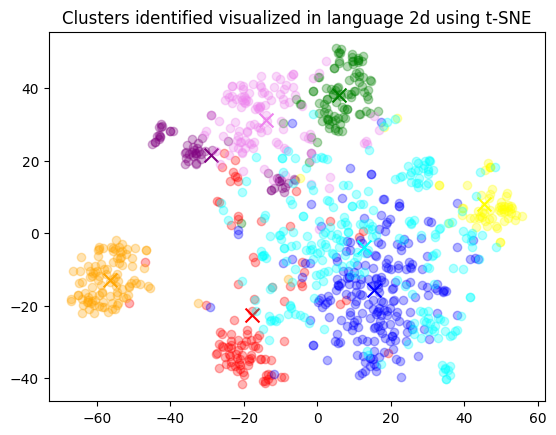

In [474]:
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init="random", learning_rate=200)
vis_dims2 = tsne.fit_transform(matrix)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for category, color in enumerate(["purple", "green", "red", "blue","yellow","orange","violet","cyan","magenta"]):
    xs = np.array(x)[df.Cluster == category]
    ys = np.array(y)[df.Cluster == category]
    plt.scatter(xs, ys, color=color, alpha=0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)
plt.title("Clusters identified visualized in language 2d using t-SNE")


Visualization of clusters in a 2d projection. In this run, the green cluster (#1) seems quite different from the others. Let's see a few samples from each cluster.